In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('D:\Studiowe\Wstep_do_eksploracji_danych\TalalajMichal\Animation_Movies.csv')

<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
C:\Users\misie\AppData\Local\Temp\ipykernel_15740\745097986.py:6: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv('D:\Studiowe\Wstep_do_eksploracji_danych\TalalajMichal\Animation_Movies.csv')


In [ ]:
print(f"Liczba wierszy: {df.shape[0]}")
print(f"Liczba kolumn: {df.shape[1]}")

print("\n Liczba braków danych w całym df:")
print(df.isnull().sum().sum())

zero_count = (df['vote_count'] == 0).sum()
print("Liczba zer  w kolumnie 'vote_count' (można je uznać za brak danych): \n ", zero_count)

print("\n Typ zmiennych w danej kolumnie:")
print(df.dtypes)

Liczba wierszy: 51945
Liczba kolumn: 23

 Liczba braków danych w całym df:
224610
Liczba zer  w kolumnie 'vote_count' i 'vote_average' (można je uznać za brak danych): 
  30779

 Typ zmiennych w danej kolumnie:
id                        int64
title                    object
vote_average            float64
vote_count                int64
status                   object
release_date             object
revenue                   int64
runtime                   int64
adult                      bool
backdrop_path            object
budget                    int64
homepage                 object
imdb_id                  object
original_language        object
original_title           object
overview                 object
popularity              float64
poster_path              object
tagline                  object
genres                   object
production_companies     object
production_countries     object
spoken_languages         object
dtype: object


In [18]:
print("Statystyki dla kolumn 'runtime' i 'vote_average':")
print(df[['runtime', 'vote_average']].describe().T)

print("\n Analiza zmiennej kategorycznej 'original_language':")
print("Liczba unikalnych języków:", df['original_language'].nunique())
print("Top 5 najczęstszych języków:")
print(df['original_language'].value_counts().head(5))

Statystyki dla kolumn 'runtime' i 'vote_average':
                count       mean        std  min  25%  50%   75%     max
runtime       51945.0  20.901415  39.016002  0.0  3.0  7.0  19.0  3720.0
vote_average  51945.0   2.597083   3.318748  0.0  0.0  0.0   6.0    10.0

 Analiza zmiennej kategorycznej 'original_language':
Liczba unikalnych języków: 102
Top 5 najczęstszych języków:
original_language
en    28584
ja     5330
fr     2998
ru     2871
es     1472
Name: count, dtype: int64


Średnia i mediana czasu trwania animacji jest niska (około 21 i 7 minut), co odpowiada typowym krótkim formom animowanym. Ponad połowa animacji ma średnią ocenę równą 0 wynikającą głownie z braku głosów, co znacząco zniekształca statystyki.

Dominującym językiem oryginalnym jest angielski, ale zbiór obejmuje aż 102 języki, co świadczy o globalnym charakterze produkcji animacji. 

In [ ]:
top_countries = df['production_countries'].value_counts().head(5).index.tolist()

# grupujemy mniej popularne kraje jako 'Other'
df['country_group'] = df['production_countries'].apply(
    lambda x: x if x in top_countries else 'Other'
)

# obliczenie statystyk budżetu dla każdej grupy
grouped_stats = df.groupby('country_group')['budget'].agg(['count', 'mean', 'std', 'max']).reset_index()

print("Statystki dla budżetu animacji w zależności od kraju produkcji: \n")
print(grouped_stats)

Statystki dla budżetu animacji w zależności od kraju produkcji: 

              country_group  count          mean           std        max
0                    Canada   1616  2.908547e+04  5.094668e+05   12500000
1                    France   2136  1.881145e+05  3.095591e+06   87000000
2                     Japan   5182  1.903554e+05  3.068059e+06  150000000
3                     Other  28321  2.563966e+05  3.880568e+06  180000000
4            United Kingdom   1854  9.807934e+04  1.887425e+06   60000000
5  United States of America  12836  1.639086e+06  1.390997e+07  260000000


Najwyższą średnią wartość ma przemysł amerykański, z budżetem sięgającym ponad 1,6 miliona. Kraje takie jak Japonia, Francja i grupa 'Other' mają średnie budżety znacznie niższe, choć ich maksymalne wartości wskazują na istnienie pojedynczych dużych produkcji. Warto także zauważyć, że średni budżet Kanady jest najniższy spośród analizowanych, co może odzwierciedla mniejszą skalę animowanych produkcji w tym kraju.

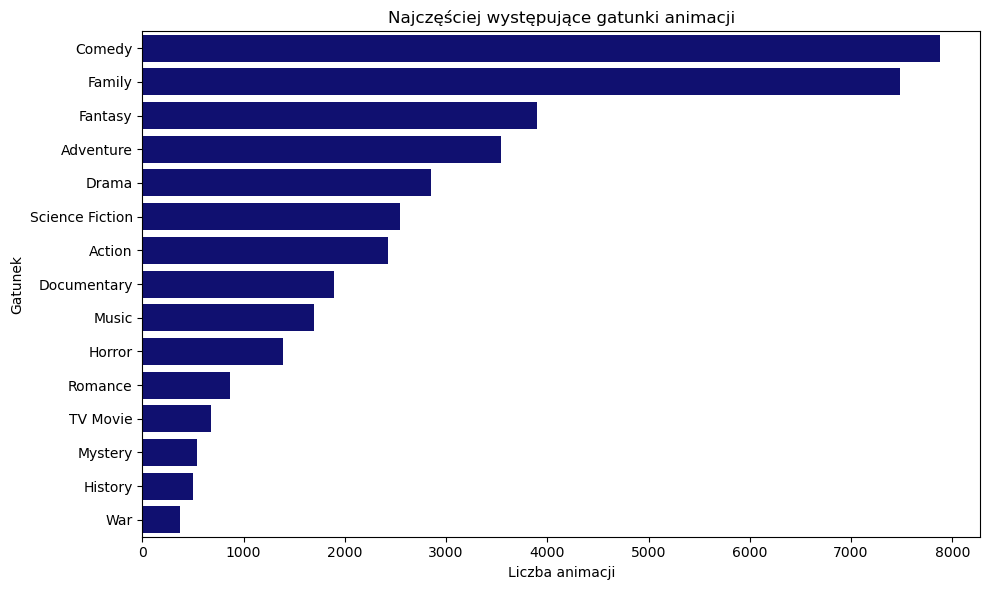

In [ ]:
df['genres'] = df['genres'].fillna('')

# Rozdzielanie na listy 
df['genre_list'] = df['genres'].str.split(',')

# Rozwijanie list na osobne wiersze
df_exploded = df.explode('genre_list')
df_exploded['genre_list'] = df_exploded['genre_list'].str.strip()

# Grupowanie i zliczanie gatunków
df_exploded = df_exploded[df_exploded['genre_list'].str.lower() != 'animation']
genre_counts = df_exploded['genre_list'].value_counts().head(15)


plt.figure(figsize=(10,6))
sns.barplot(y=genre_counts.index, x=genre_counts.values, color = 'navy')
plt.title('Najczęściej występujące gatunki animacji')
plt.xlabel('Liczba animacji')
plt.ylabel('Gatunek')
plt.tight_layout()
plt.show()


Zdecydowanie dominują animacje komediowe i familijne, co sugeruje ich dużą popularność wśród twórców i odbiorców. Można zauważyć, że bardzo mało animacji zalicza się do kategorii wojennych, historycznych albo Mystery, co może być efektem ich mniejszej atrakcyjności w kontekście animowanych produkcji lub trudności w ich realizacji w tej formie.

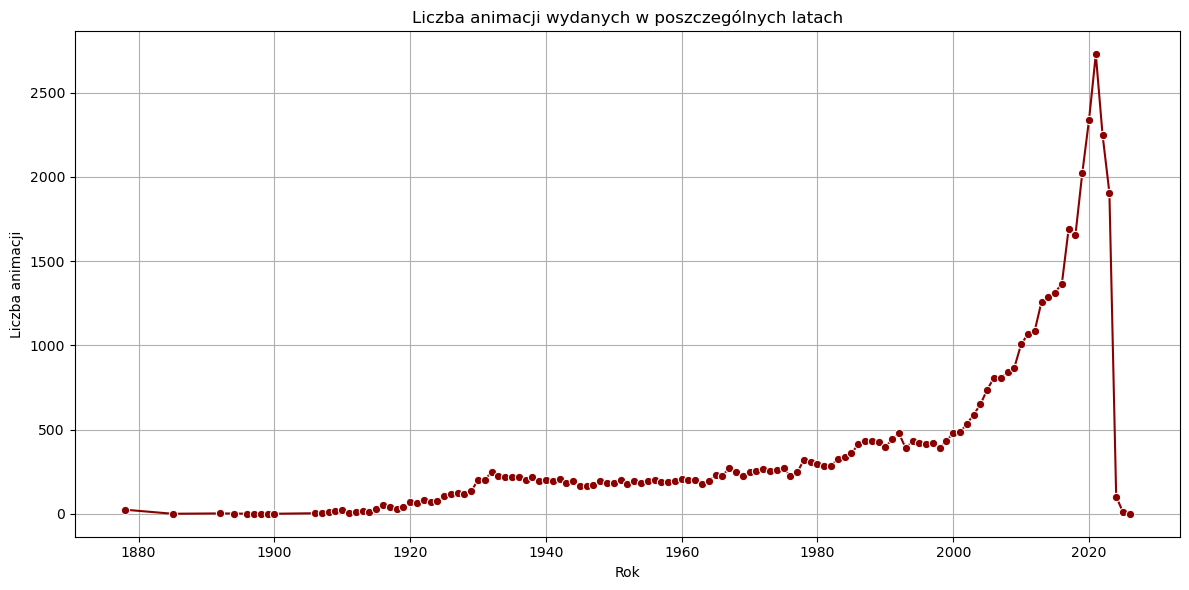

In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year

# Zliczanie liczby filmów na rok
yearly_counts = df['release_year'].value_counts()

plt.figure(figsize=(12,6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o', color='darkred')
plt.title('Liczba animacji wydanych w poszczególnych latach')
plt.xlabel('Rok')
plt.ylabel('Liczba animacji')
plt.grid(True)
plt.tight_layout()
plt.show()

Produkcja animacji zaczęła wyraźnie rosnąć od lat 50., co zbiega się z upowszechnieniem telewizji jako medium dostępnym dla przeciętnego odbiorcy. Wcześniejsze lata cechowały się niewielką liczbą produkcji, natomiast od roku 2000 obserwujemy dynamiczny wzrost, napędzany rozwojem technologii, internetu i globalnego rynku rozrywki. Szczyt przypada około 2020 roku, po czym następuje gwałtowny spadek  wynikający z niekompletności danych w najnowszych latach.

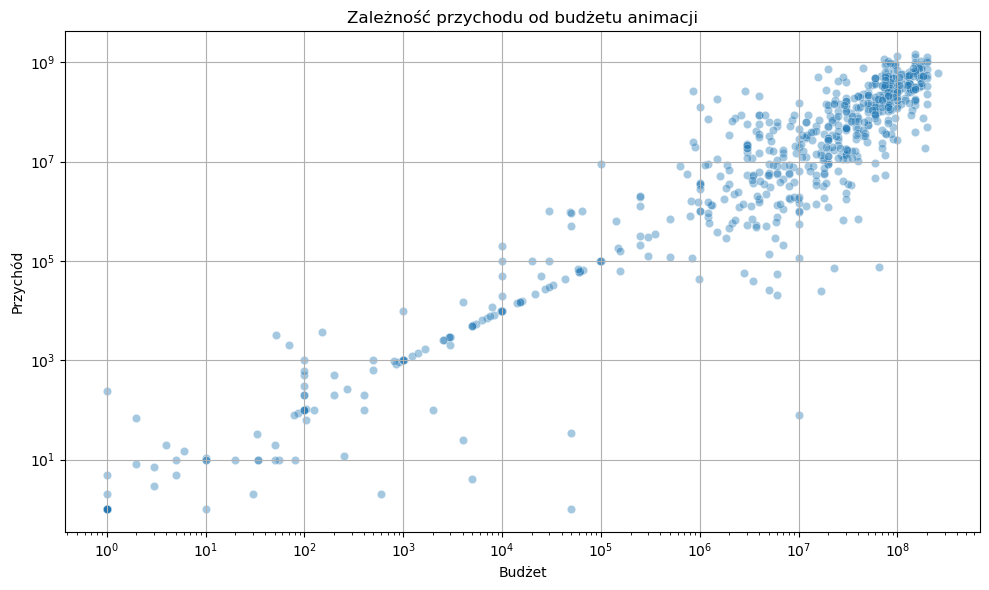

In [38]:
# Usunięcie wierszy, w których budżet lub przychód wynosi 0
df_nonzero = df[(df['budget'] > 0) & (df['revenue'] > 0)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_nonzero, x='budget', y='revenue', alpha=0.4)
plt.title('Zależność przychodu od budżetu animacji')
plt.xlabel('Budżet')
plt.ylabel('Przychód')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

Na wykresie widoczna jest wyraźna dodatnia zależność między budżetem a przychodem animacji – wyższy budżet często wiąże się z większym zyskiem. Jednak zwraca uwagę nietypowy liniowy ciąg punktów, w którym przychód jest równy budżetowi. Może to sugerować ustawianie wartości domyślej przychodu jako budżetu. 